In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sb

import phasik as pk

sb.set_context("paper")

In [2]:
palette = sb.color_palette("tab10", n_colors=4)

sb.set_palette(palette)
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)]

In [3]:
# load edge time series
edge_activity_filepath = "../data/chen/edge_time_series_normed.csv"
# edge_activity_filepath = "data/chen/edge_time_series.csv"
norm = True

out_dir = "images/chen/"

# use this for non-normalised time series
# edge_activity_filepath = "data/chen/edge_time_series.csv"
# norm = False

edge_series = pd.read_csv(edge_activity_filepath).transpose()
times = list(edge_series.columns)

temp_data = pk.TemporalData.from_df(
    edge_series.transpose(), times=times, true_times=times
)
edge_series_dict = temp_data.to_dict()

In [4]:
phases = [(0, 35, "G1"), (35, 70, "S"), (70, 78, "G2"), (78, 100, "M")]

In [5]:
links_peaks = {}

for edge, series in edge_series_dict.items():

    #     print(edge, series)

    # create dict of peaks and phases
    i_max = np.argmax(series)
    t_max = times[i_max]

    #     print(i_max, t_max)

    phases_flat = np.array([0, 35, 70, 78, 100])

    for j in range(4):
        t_i, t_f = phases_flat[j : j + 2]
        #         print(t_i, t_f)
        if t_max >= t_i and t_max <= t_f:
            phase = j
            break

    links_peaks[edge] = {"peak": t_max, "phase": phase}

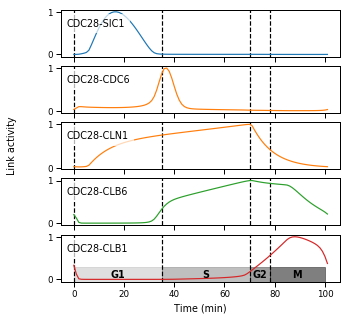

In [6]:
links_list = [
    "CDC28-SIC1",
    "CDC28-CDC6",
    "CDC28-CLN1",
    "CDC28-CLB6",
    "CDC28-CLB1",
]

fig, axs = plt.subplots(
    len(links_list), 1, sharex=True, figsize=(5, 5)
)  # ,sharey=True)

colors = [f'C{links_peaks[edge]["phase"]}' for edge in links_list]


i = 0
for edge in links_list:

    series = edge_series_dict[edge]

    ax = axs[i]
    ax.plot(series, label=edge, c=colors[i])
    props = dict(facecolor="white", alpha=0.7, edgecolor="white")
    ax.text(0.02, 0.82, edge, transform=ax.transAxes, va="top", bbox=props)
    i += 1

pk.plot_phases(phases, ax=axs[-1], y_pos=0.15, ymax=0.3)
events_times = list(phases_flat)
events_labels = [" ", " ", "", ""]
events = [(time, name, "dashed") for time, name in zip(events_times, events_labels)]
for i, ax in enumerate(axs):
    pk.plot_events(events, ax=ax)


axs[2].set_ylabel("Link activity", labelpad=30)
axs[-1].set_xlabel("Time (min)")

# plt.savefig(out_dir + "fig2_b_temporal_info.png", dpi=300, bbox_inches="tight")
# plt.savefig(out_dir + "fig2_b_temporal_info.svg", dpi=300, bbox_inches="tight")
# plt.savefig(out_dir + 'fig2_b_temporal_info.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [7]:
data_dir = "../data/kegg/"

G = nx.read_adjlist(data_dir + "static_PPI_network_KEGG.adjlist")
# G = nx.read_adjlist(data_dir + "static_PPI_network_KEGG.edgelist")

# nx.write_gexf(G, "kegg_raw_clean2.gexf" )

edges_common = np.load(data_dir + "edges_common.npy")
edges_common = [tuple(u) for u in edges_common]
nodes_common = list(np.load(data_dir + "nodes_common.npy"))

In [8]:
def move_node(node, x_offset, y_offset):
    x, y = pos[node]
    #     print(x, y)
    pos[node] = (x + x_offset, y + y_offset)
    #     print(pos[node])
    return pos

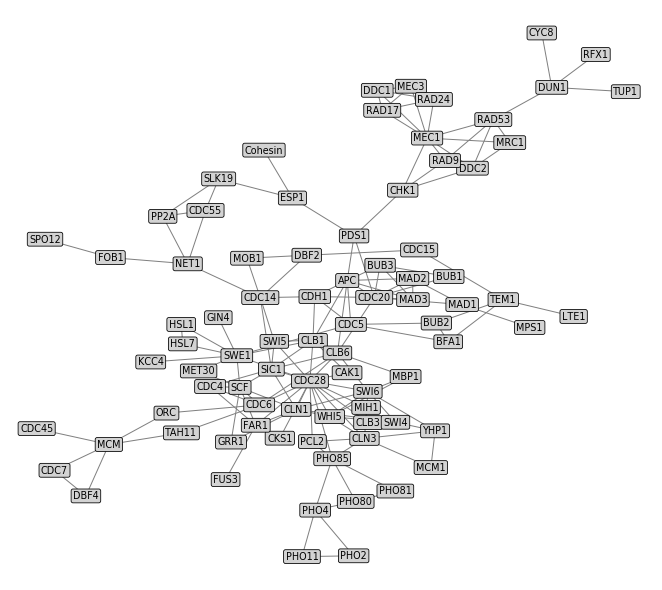

In [9]:
plt.figure(figsize=(9, 8))

pos = nx.spring_layout(G, k=0.2)

params = {
    "with_labels": True,
    "node_color": "white",
    "node_size": 100,
    #             'edge_color': 'k',
    "font_color": "k",
    "font_size": "medium",
    "bbox": dict(facecolor="lightgrey", edgecolor="black", boxstyle="round, pad=0.2"),
}


# pos = move_node("CDC28", 0, 20)
# pos = move_node("CDC14", -10, -30)
# pos = move_node("SWI5", 0, 10)
# pos = move_node("SCF", 10, 0)
# pos = move_node("CLB3", +10, -10)

# pos = move_node("TEM1", 0, -30)
# pos = move_node("DBF2", 0, -30)
# pos = move_node("BFA1", -30, 0)

pos = move_node("CDC28", 0, 20)
pos = move_node("WHI5", -15, 0)
pos = move_node("CDC55", 20, 0)
pos = move_node("HSL1", -20, 0)
pos = move_node("KCC4", -30, 0)
pos = move_node("SWE1", -30, 0)
pos = move_node("APC", 0, 25)
pos = move_node("CDC6", 0, -15)
pos = move_node("SIC1", -15, -15)
pos = move_node("TEM1", 10, 0)
pos = move_node("BUB1", 10, 0)
pos = move_node("MPS1", -10, -20)


nx.draw(G, pos=pos, edge_color="grey", **params)

# temporal info
# nx.draw_networkx_edges(G,  edgelist=edges_common, edge_color='red', width=1.5, pos=pos, **params)
nx.draw_networkx_nodes(
    G,
    nodelist=nodes_common,
    node_color="silver",
    edgecolors="red",
    pos=pos,
    node_size=100,
)  # , **params)

# draw red edge for temporal nodes
# labels = {node : node for node in nodes_common}
# nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size='medium',
#                         bbox=dict(facecolor="lightgrey", edgecolor='black', boxstyle='round, pad=0.2'))

# draw shade of red for temporal edges
# colors = [f'C{edge["phase"]}' for edge in links_peaks.values()]
# edges_col = nx.draw_networkx_edges(G,  edgelist=edges_common, edge_color=colors, width=2.5, pos=pos, **params)

# custom legend
# custom_lines = [Line2D([0], [0], color="grey", lw=2),
#                 Line2D([0], [0], color=palette[0], lw=2),
#                 Line2D([0], [0], color=palette[1], lw=2),
#                 Line2D([0], [0], color=palette[2], lw=2),
#                Line2D([0], [0], color=palette[3], lw=2)]

# plt.legend(custom_lines, ['no temporal data', 'G1', 'S', 'G2', 'M'], loc="best", fontsize="large")


# nx.draw_networkx_nodes(G,  pos=pos, nodelist=["CDC28"], node_color='red')
# nx.draw_networkx_nodes(G,  pos=pos, nodelist=["CLN3", "CLN1...", "CLB6...", "CLB3...", "CLB1"], node_color='blue')
# nx.draw_networkx_nodes(G,  pos=pos, nodelist=["SIC1", "CDH1", "SWI5", "CDC14", "CDC20", "CDC6", "NET1", "PDS1"], node_color='green')

# plt.savefig(out_dir + "cell_cycle_static_pin.pdf", dpi=300, bbox_inches="tight")
# plt.savefig(out_dir + "cell_cycle_static_pin_2.svg", dpi=300, bbox_inches="tight")

plt.savefig(out_dir + "cell_cycle_static_pin_static.svg", dpi=300, bbox_inches="tight")
plt.savefig(out_dir + "cell_cycle_static_pin_static.png", dpi=300, bbox_inches="tight")

In [10]:
edge_series_td = pk.TemporalData.from_df(
    edge_series.transpose(), times=times, true_times=times
)

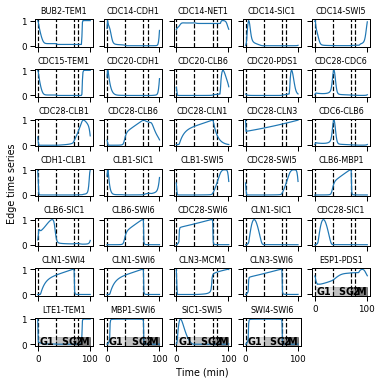

In [14]:
fig, axs = plt.subplots(7, 5, sharex=True, sharey=True, figsize=(6, 6))

i = 0
for edge in edge_series.index:

    ax = axs.flatten()[i]
    edge_series_td.plot_series([edge], ax=ax, add_labels=False, use_true_times=False)

    ax.set_title(edge, fontsize="small")
    i += 1

# tidy up grid of axes
pk.label_subplot_grid_with_shared_axes(
    7,
    5,
    total_subplots=len(edge_series),
    xlabel="",
    ylabel="",
    fig=fig,
    axes=axs,
)

axs[3, 0].set_ylabel("Edge time series")
axs[-1, 2].set_xlabel("Time (min)")

plt.subplots_adjust(hspace=0.8)

for i, ax in enumerate(axs[-1, :]):
    pk.plot_phases(phases, ax=ax, y_pos=0.15, ymax=0.3)
pk.plot_phases(phases, ax=axs[-2, -1], y_pos=0.15, ymax=0.3)

events_times = list(phases_flat)
events_labels = [" ", " ", "", ""]
events = [(time, name, "dashed") for time, name in zip(events_times, events_labels)]
for i, ax in enumerate(axs.flatten()):
    pk.plot_events(events, ax=ax)

# plt.savefig(f"{out_dir}edge_times_series_normed.png", dpi=250, bbox_inches="tight")
# plt.savefig(f"{out_dir}edge_times_series_normed.svg", dpi=250, bbox_inches="tight")
# plt.savefig(f"{out_dir}edge_times_series_normed.pdf", dpi=250, bbox_inches="tight")

plt.show()